<a href="https://colab.research.google.com/github/andrepilo/Data-science/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

url = "https://raw.githubusercontent.com/andrepilo/Data-science/c8e1f1d1a494117b726a29b6b6ac66004984fe78/StudentsPerformance.csv"
df = pd.read_csv(url)
df.head()  # mostra le prime righe del dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
print(len(df))

1000


In [30]:
# Codice LaTeX
latex_code = df.head(10).to_latex(index=False)
print(latex_code)

\begin{tabular}{lllllrrr}
\toprule
gender & race/ethnicity & parental level of education & lunch & test preparation course & math score & reading score & writing score \\
\midrule
female & group B & bachelor's degree & standard & none & 72 & 72 & 74 \\
female & group C & some college & standard & completed & 69 & 90 & 88 \\
female & group B & master's degree & standard & none & 90 & 95 & 93 \\
male & group A & associate's degree & free/reduced & none & 47 & 57 & 44 \\
male & group C & some college & standard & none & 76 & 78 & 75 \\
female & group B & associate's degree & standard & none & 71 & 83 & 78 \\
female & group B & some college & standard & completed & 88 & 95 & 92 \\
male & group B & some college & free/reduced & none & 40 & 43 & 39 \\
male & group D & high school & free/reduced & completed & 64 & 64 & 67 \\
female & group B & high school & free/reduced & none & 38 & 60 & 50 \\
\bottomrule
\end{tabular}



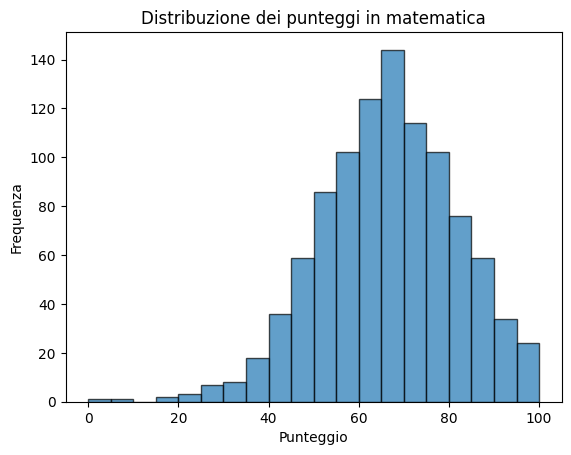

In [51]:
# Istogramma dei risultati in matematica "math_score"
df['math_score'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)

# titolo e etichette agli assi
plt.title('Distribuzione dei punteggi in matematica')
plt.xlabel('Punteggio')
plt.ylabel('Frequenza')

# grafico
plt.show()

In [35]:
# Preprocessing: Rinominare le colonne in minuscolo e senza spazi
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df.head()


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# Codifica delle variabili categoriche
df_encoded = pd.get_dummies(df, drop_first=False)
df_encoded.head()


,math_score,reading_score,writing_score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


In [45]:
# Separazione tra variabili indipendenti (X) e target (y)
X = df_encoded.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y = df_encoded['math_score']


In [46]:
# Divisione del dataset in train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [47]:
# Addestramento del modello di regressione lineare
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [54]:
# Predizione e valutazione del modello di regressione lineare
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lin = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lin)
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print(f"Linear Regression - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.3f}")


Linear Regression - MAE: 10.76, MSE: 189.39, R2: 0.200


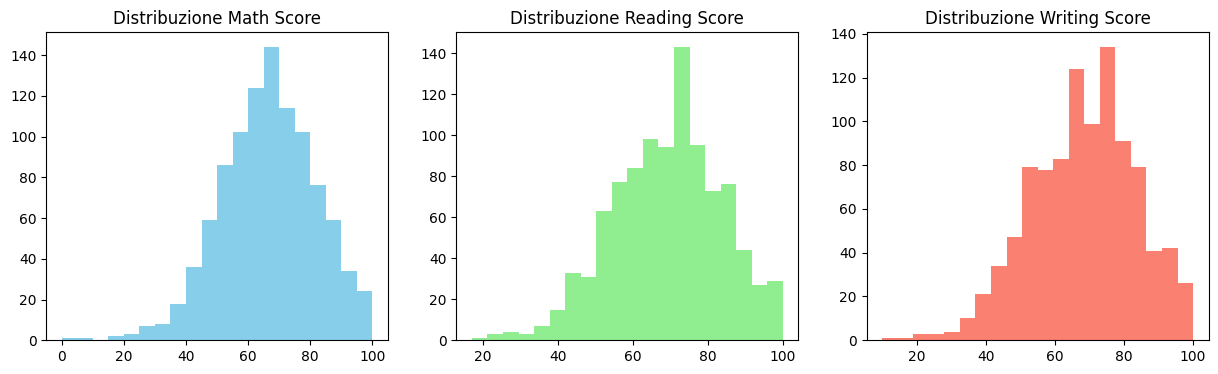

In [49]:
# Istogrammi dei puntaggi
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.hist(df['math_score'], bins=20, color='skyblue')
plt.title('Distribuzione Math Score')

plt.subplot(1,3,2)
plt.hist(df['reading_score'], bins=20, color='lightgreen')
plt.title('Distribuzione Reading Score')

plt.subplot(1,3,3)
plt.hist(df['writing_score'], bins=20, color='salmon')
plt.title('Distribuzione Writing Score')

plt.show()


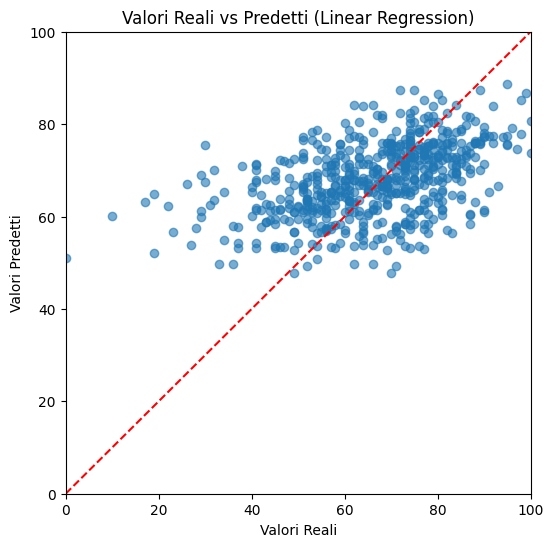

In [50]:
# Scatterplot valore reale vs valore predetto
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Valori Reali vs Predetti (Linear Regression)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()


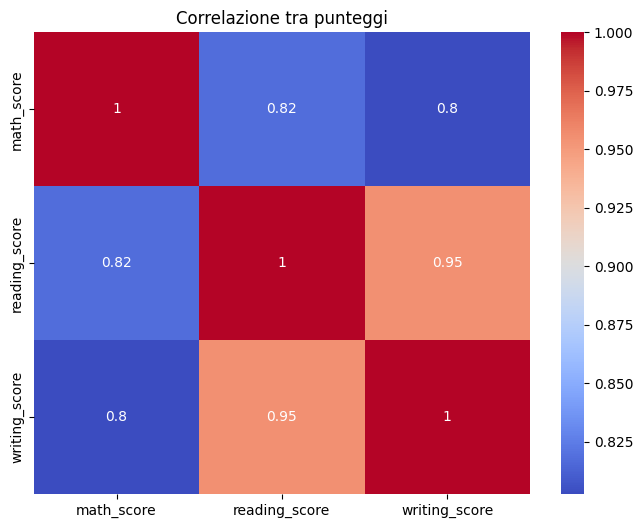

In [22]:
import seaborn as sns

plt.figure(figsize=(8,6))
corr = df[['math_score', 'reading_score', 'writing_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlazione tra punteggi')
plt.show()


Random Forest - MAE: 12.40, RMSE: 15.73, R2: -0.017
